### Loading a Dataset

In [4]:
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_wine
iris_data = load_iris()
wine_data =load_wine()
housing_data = fetch_california_housing(as_frame=True)

### Understanding the Data

In [5]:
print(iris_data.keys()) 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


##### **data**: Contains the actual data, which in this case is a 2D array where each row represents a flower, and each column represents a feature (e.g., petal length, sepal width).

##### **target**: Contains the labels for each row in the dataset. These are integers representing the species of the flowers.

##### **target_names**: Names of the target classes (i.e., species names like ‘setosa’, ‘versicolor’, etc.).

##### **feature_names**: Names of the features (e.g., sepal length, petal width).

##### **DESCR**: A detailed description of the dataset.

### Accessing the Data

In [6]:
X = iris_data['data']
Y = iris_data['target']

print("Feature of data shape",X.shape)
print("Feature of data shape",Y.shape)

Feature of data shape (150, 4)
Feature of data shape (150,)


***.shape: This tells us the dimensions of X and y. In the Iris dataset, X will have a shape of (150, 4), meaning there are 150 flowers, and each has 4 features. y will have a shape of (150,), meaning there are 150 labels (one for each flower).***

#### Exploring the Data

In [7]:
print("First 5 rows of feature data :\n",X[:5])
print()
print("First 5 rows of target variables :\n",Y[:5])
print()
print(" Target Names:\n",iris_data["target_names"])


First 5 rows of feature data :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 rows of target variables :
 [0 0 0 0 0]

 Target Names:
 ['setosa' 'versicolor' 'virginica']


## Splitting the Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

X_train and y_train: These are the training data and labels. The model will use these to learn the patterns.

X_test and y_test: These are the testing data and labels. Once the model is trained, we'll use this data to evaluate how well it performs on unseen data.
For the Iris dataset, since we specified test_size=0.2, we’ll have 80% of the data in the training set and 20% in the test set. Since there are 150 samples in total:

Training set: 120 samples
Test set: 30 samples

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
Y_train shape: (120,)
Y_test shape: (30,)


#### X_train has 120 samples with 4 features each.
#### X_test has 30 samples with 4 features each.
#### y_train has 120 target labels corresponding to X_train.
#### y_test has 30 target labels corresponding to X_test.

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)

logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

#### Making predictions on the Test Set

In [11]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [12]:
Y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [13]:
Y_pred = logreg.predict(X_test)

print("Predicted labels:",Y_pred)

print("Actual Labels:",Y_test)

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


#### Evaluating the Model's Perfomance

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test,Y_pred)

print("Accuracy:",accuracy*100,"%")

Accuracy: 100.0 %


#### Evaluate the Model with Other Metrics

##### 1.**Confusion Matrix** : a table that shows the numbers of correct and incorrect predictions for each class

##### 2. **Precision,Recall,F1_Score** : These metrics give a deeper understanding of the model's classification perfomance

In [15]:
from sklearn.metrics import confusion_matrix,classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(Y_test,Y_pred,target_names=iris_data.target_names)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Classification Report:

##### **classification_report(y_test, y_pred)**: This function generates a detailed report with precision, recall, and F1-score for each class.
##### **The precision** is the ratio of correct positive predictions to the total predicted positives.
##### **The recall** is the ratio of correct positive predictions to the total actual positives.
##### **The F1-score** is the harmonic mean of precision and recall, giving you a balance between them.

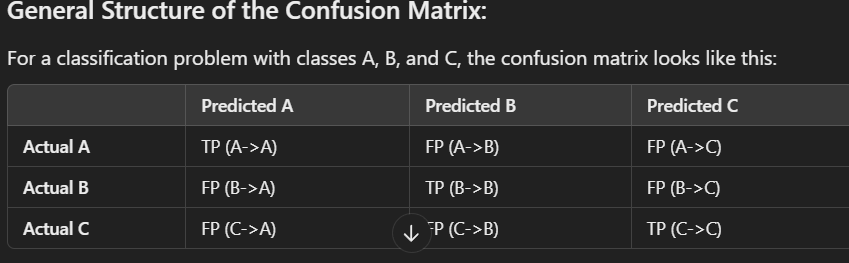

<!-- General Structure of the Confusion Matrix:
For a classification problem with classes A, B, and C, the confusion matrix looks like this:

Predicted A	Predicted B	Predicted C
Actual A	TP (A->A)	FP (A->B)	FP (A->C)
Actual B	FP (B->A)	TP (B->B)	FP (B->C)
Actual C	FP (C->A)	FP (C->B)	TP (C->C) -->

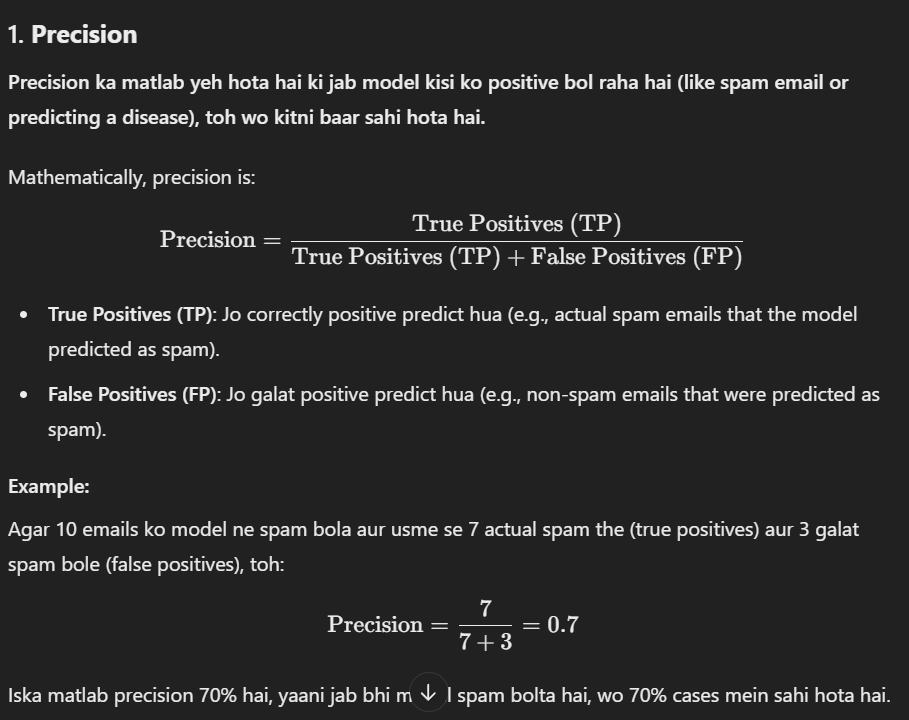

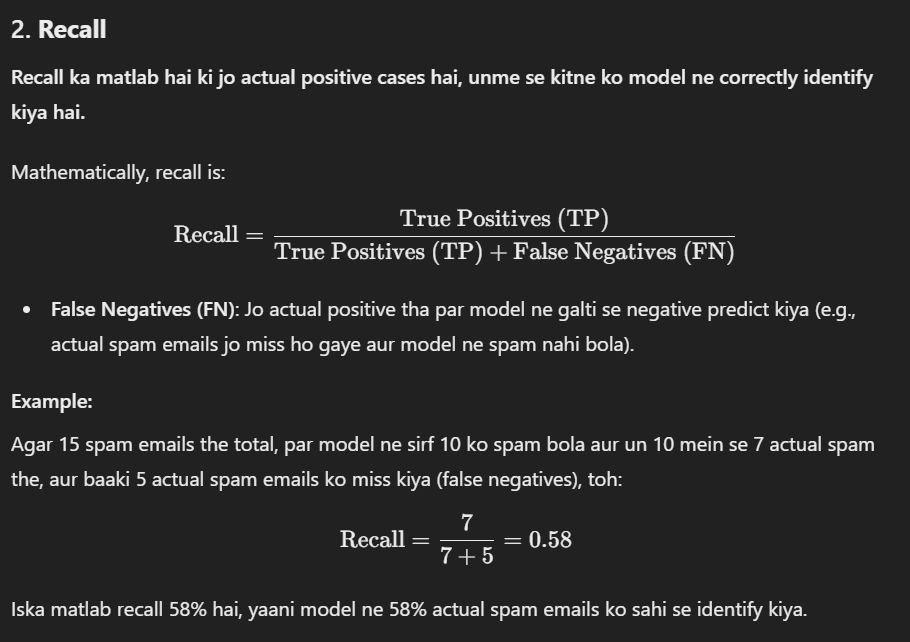

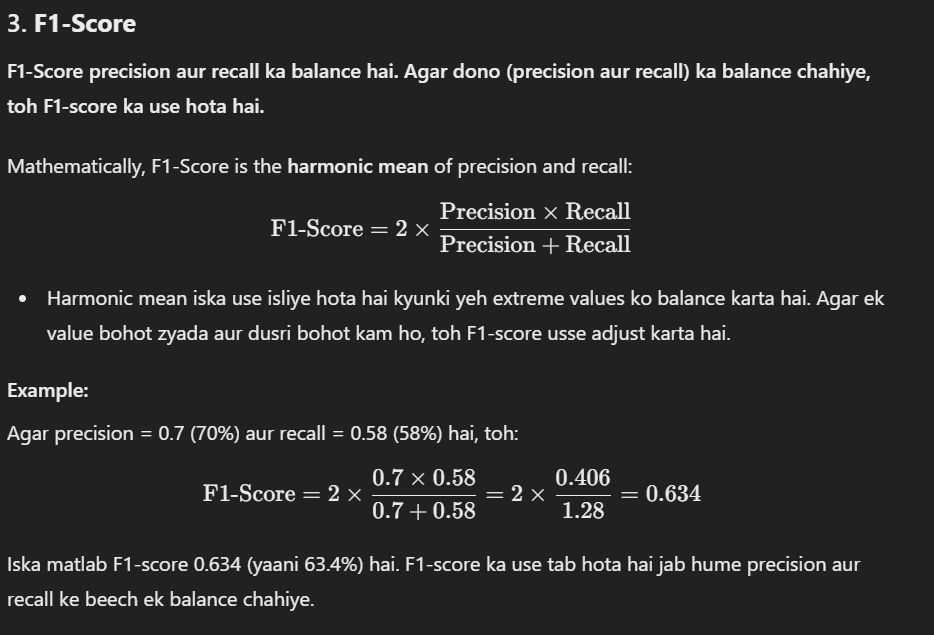

## Cross-Validation
Cross-validation is a method to evaluate the performance of a machine learning model by training and testing it multiple times on different subsets of the data. This helps in understanding how well the model generalizes to unseen data and avoids overfitting.

## Why Cross-Validation?
##### 1. Instead of relying on a single train-test split, cross-validation provides a more reliable measure of model performance.

##### 2. It divides the data into multiple folds and trains the model multiple times, each time on a different training set, while testing it on a different test set.

##### 3. It gives a better estimate of the model's performance, especially when the dataset is small.

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg,X,Y,cv=5)

print("Cross-Validation scores for each fold:",cv_scores)

print("Average cross-validation accuracy:",cv_scores.mean())

Cross-Validation scores for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation accuracy: 0.9733333333333334


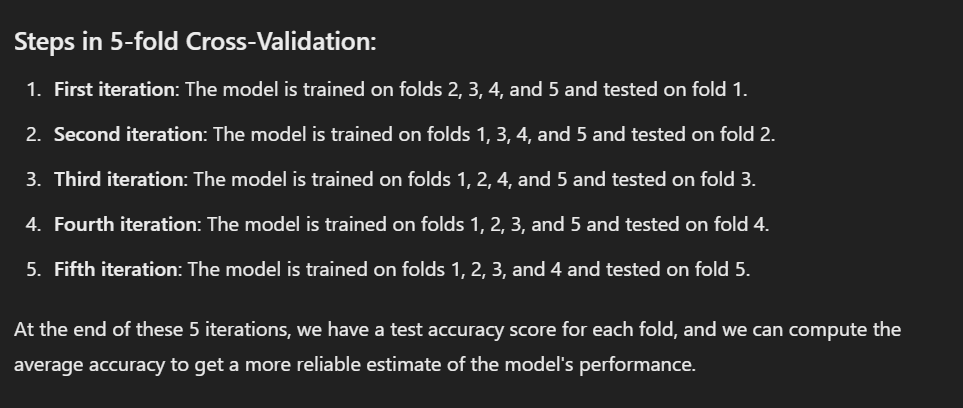

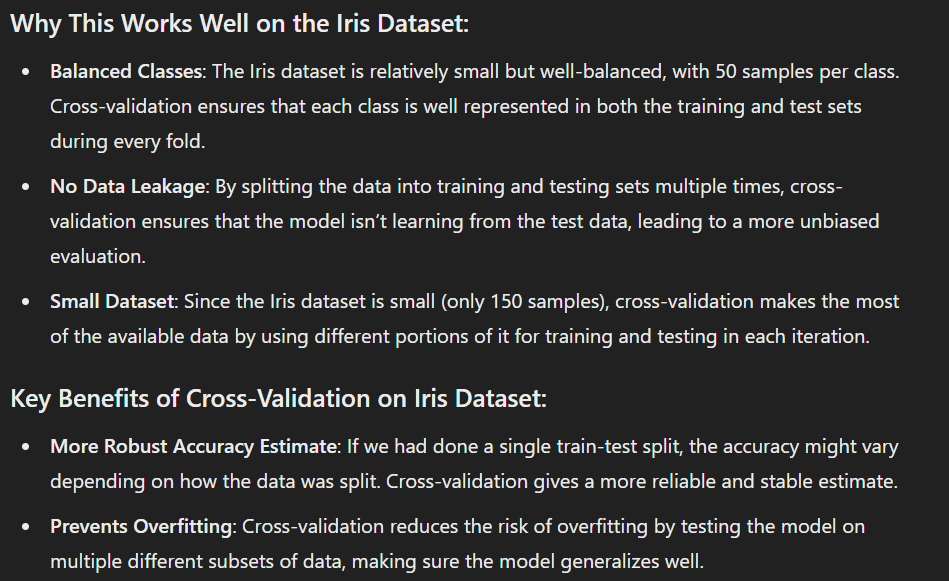